In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
movies = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/movies_new.csv')

In [3]:
movies.head()

,Unnamed: 0,movieId,ratings_count,ratings_mean,title,genres,COMEDY,DRAMA,DOCUMENTARY,HORROR,...,CHILDRENS,CRIME,FANTASY,FILM-NOIR,MUSICAL,SCI-FI,MYSTERY,WAR,Year,title_list
0,0,1,63469,3.889300,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1995.0,"['Toy', 'Story']"
1,1,2,25045,3.229527,Jumanji (1995),Adventure|Children|Fantasy,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1995.0,['Jumanji']
2,2,3,15381,3.178142,Grumpier Old Men (1995),Comedy|Romance,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,"['Grumpier', 'Old', 'Men']"
3,3,4,2961,2.879433,Waiting to Exhale (1995),Comedy|Drama|Romance,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,"['Waiting', 'to', 'Exhale']"
4,4,5,15023,3.080410,Father of the Bride Part II (1995),Comedy,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,"['Father', 'of', 'the', 'Bride', 'Part', 'II']"


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 25 columns):
Unnamed: 0       32573 non-null int64
movieId          32573 non-null int64
ratings_count    32573 non-null int64
ratings_mean     32573 non-null float64
title            27622 non-null object
genres           27622 non-null object
COMEDY           27622 non-null float64
DRAMA            27622 non-null float64
DOCUMENTARY      27622 non-null float64
HORROR           27622 non-null float64
THRILLER         27622 non-null float64
WESTERN          27622 non-null float64
ROMANCE          27622 non-null float64
ADVENTURE        27622 non-null float64
ANIMATION        27622 non-null float64
CHILDRENS        27622 non-null float64
CRIME            27622 non-null float64
FANTASY          27622 non-null float64
FILM-NOIR        27622 non-null float64
MUSICAL          27622 non-null float64
SCI-FI           27622 non-null float64
MYSTERY          27622 non-null float64
WAR              27

In [5]:
movies['genres'] = movies['genres'].astype(str)

In [6]:
def replace(x):

    replaced = x.replace('|', ',')
    list1 = replaced.split(',')
    return list1
    


movies['genres_list'] = movies['genres'].map(replace)

In [7]:
movies.head()

,Unnamed: 0,movieId,ratings_count,ratings_mean,title,genres,COMEDY,DRAMA,DOCUMENTARY,HORROR,...,CRIME,FANTASY,FILM-NOIR,MUSICAL,SCI-FI,MYSTERY,WAR,Year,title_list,genres_list
0,0,1,63469,3.889300,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1995.0,"['Toy', 'Story']","[Adventure, Animation, Children, Comedy, F..."
1,1,2,25045,3.229527,Jumanji (1995),Adventure|Children|Fantasy,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1995.0,['Jumanji'],"[Adventure, Children, Fantasy]"
2,2,3,15381,3.178142,Grumpier Old Men (1995),Comedy|Romance,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,"['Grumpier', 'Old', 'Men']","[Comedy, Romance]"
3,3,4,2961,2.879433,Waiting to Exhale (1995),Comedy|Drama|Romance,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,"['Waiting', 'to', 'Exhale']","[Comedy, Drama, Romance]"
4,4,5,15023,3.080410,Father of the Bride Part II (1995),Comedy,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,"['Father', 'of', 'the', 'Bride', 'Part', 'II']",[Comedy]


In [8]:
movies.shape


(32573, 26)

In [9]:
movies.dropna(inplace=True)

In [10]:
movies.shape

(27622, 26)

In [32]:
movies['genres_list'] = movies['genres_list'].map(lambda x: set([x_.strip().lower() for x_ in x]))

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import svm

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(movies['genres_list'])

In [34]:
mlb.classes_

array(['(no genres listed)', 'action', 'adventure', 'animation',
       'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western'], dtype=object)

In [35]:
x_train = movies.title_list[:19000]
y_train = y[:19000]

x_test = movies.title_list[19000:]
y_test = y[19000:]

classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(LinearSVC()))
     ])
classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)

print predicted, "Accuracy Score: ", accuracy_score(y_test, predicted)
len(predicted)
print mlb.classes_

[[0 0 0 ..., 0 1 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]] Accuracy Score:  0.111343075852
['(no genres listed)' 'action' 'adventure' 'animation' 'children' 'comedy'
 'crime' 'documentary' 'drama' 'fantasy' 'film-noir' 'horror' 'imax'
 'musical' 'mystery' 'romance' 'sci-fi' 'thriller' 'war' 'western']


Accuracy classification score:
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [24]:
y.shape

(27622, 38)

In [36]:
len(mlb.classes_)

20

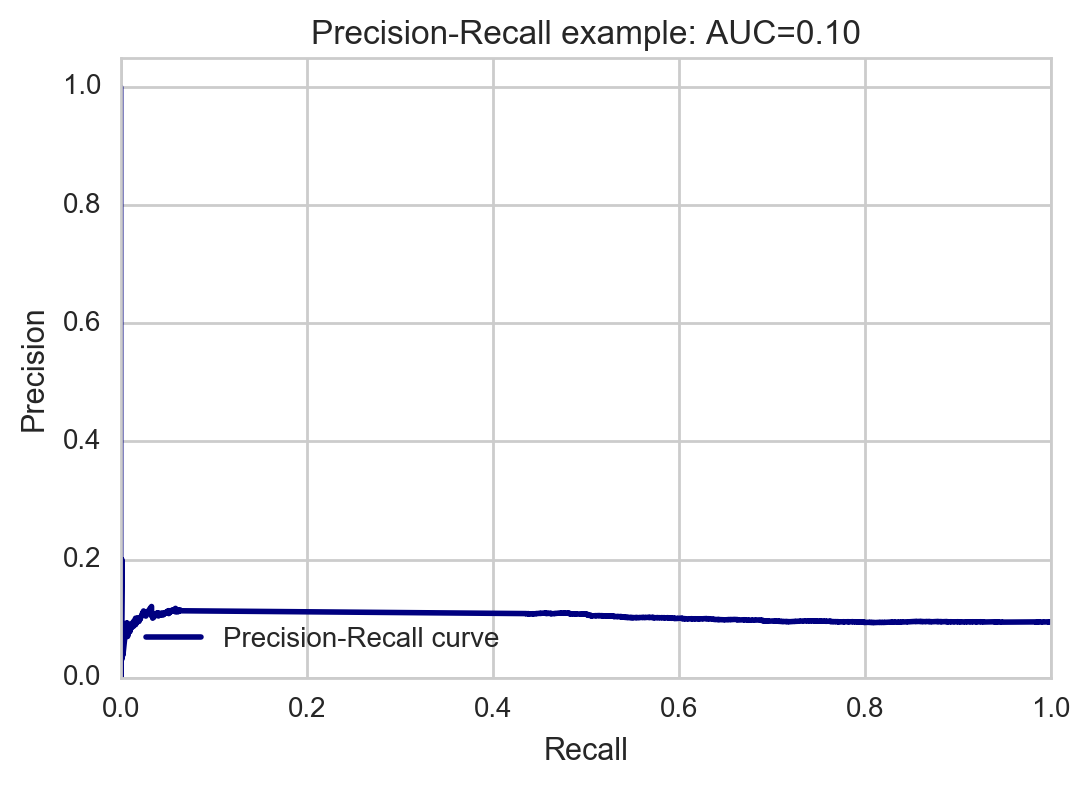

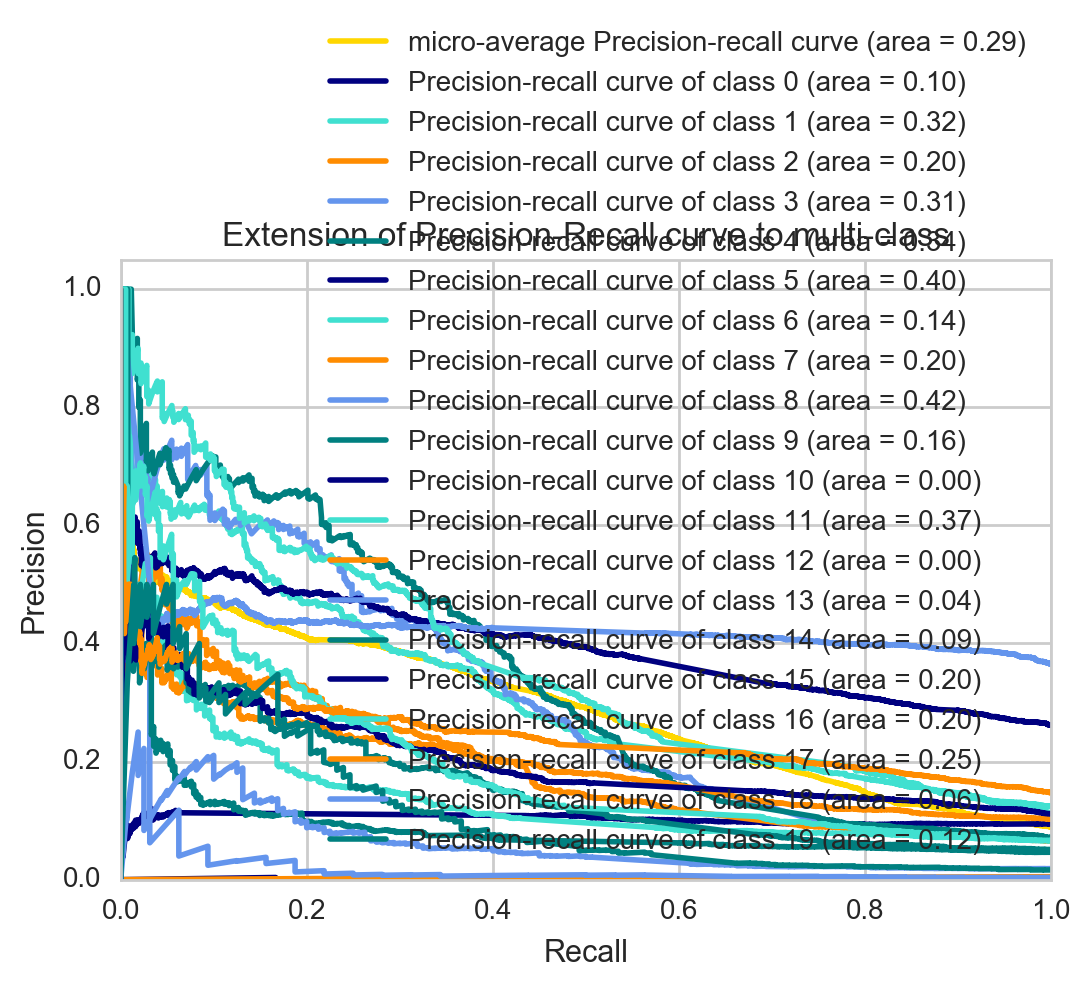

In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle

# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
lw = 2

n_classes = y.shape[1]

y_score = classifier.decision_function(x_test)


# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")


# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()


In [37]:
predicted = mlb.inverse_transform(predicted)


In [38]:
actual = mlb.inverse_transform(y_test)


In [39]:
genres = pd.DataFrame({
        'actual_genres': actual,
        'predicted_genres': predicted
    })

In [40]:
genres

,actual_genres,predicted_genres
0,"(drama,)","(war,)"
1,"(western,)","(action, drama)"
2,"(documentary,)","(comedy, drama)"
3,"(children, comedy)","(drama,)"
4,"(drama,)","(drama,)"
5,"(comedy,)","(drama,)"
6,"(horror,)",()
7,"(comedy,)","(comedy,)"
8,"(adventure,)","(crime, mystery)"
9,"(sci-fi, thriller)",()


In [52]:
genres['actual_genres_list'] = genres['actual_genres'].map(lambda x: list(x))

In [54]:
genres['predicted_genres_list'] = genres['predicted_genres'].map(lambda x: list(x))

In [55]:
genres.head()

,actual_genres,predicted_genres,actual_genres_list,predicted_genres_list
0,"(drama,)","(war,)",[drama],[war]
1,"(western,)","(action, drama)",[western],"[action, drama]"
2,"(documentary,)","(comedy, drama)",[documentary],"[comedy, drama]"
3,"(children, comedy)","(drama,)","[children, comedy]",[drama]
4,"(drama,)","(drama,)",[drama],[drama]


In [88]:
lst = []
for i, j in zip(genres['actual_genres_list'], genres['predicted_genres_list']):
    #print i, ''.join(j)
    counter = 0
    for i_val in i:
        if str(i_val) in ''.join(j):
            counter += 1
    if counter >= 1:
        lst.append(1)
    else:
        lst.append(0)
            

In [91]:
genres2 = genres2.drop('at_least_one', 1)
genres2.insert(4, 'at_least_one', lst)

In [92]:
genres2

,actual_genres,predicted_genres,actual_genres_list,predicted_genres_list,at_least_one
0,"(drama,)","(war,)",[drama],[war],0
1,"(western,)","(action, drama)",[western],"[action, drama]",0
2,"(documentary,)","(comedy, drama)",[documentary],"[comedy, drama]",0
3,"(children, comedy)","(drama,)","[children, comedy]",[drama],0
4,"(drama,)","(drama,)",[drama],[drama],1
5,"(comedy,)","(drama,)",[comedy],[drama],0
6,"(horror,)",(),[horror],[],0
7,"(comedy,)","(comedy,)",[comedy],[comedy],1
8,"(adventure,)","(crime, mystery)",[adventure],"[crime, mystery]",0
9,"(sci-fi, thriller)",(),"[sci-fi, thriller]",[],0


In [93]:
genres2['at_least_one'].sum()

3578

In [94]:
3578/86.22

41.49849222918117

### Number of tested movies: 8622, number of at least one good classification: 3578 (41.5%)

In [117]:
z = np.array(['zombie in the forrest',
              'death', 
              'kill your lady at night', 
              'die django ', 
              'frankenstein', 
              'love in paris', 
              'story of a novice', 
              'soldier in the battle and his army', 
              'alice in wonderland',
             'peaky blinders', 
              'game of thrones', 
              'sex and the city', 
              'the big bang theory',
              ''
            ])
predicted_custom = classifier.predict(z)

In [118]:
mlb.inverse_transform(predicted_custom)

[('comedy', 'horror'),
 ('action',),
 ('comedy',),
 ('action', 'thriller', 'western'),
 ('horror', 'sci-fi'),
 ('comedy', 'drama', 'romance'),
 ('documentary',),
 ('action', 'war'),
 ('adventure', 'fantasy'),
 ('drama',),
 ('drama',),
 ('comedy', 'drama', 'romance'),
 ('comedy', 'drama')]